In [85]:
!git clone https://github.com/sorki/python-mnist
!./python-mnist/get_data.sh
!pip3 install emnist
from emnist import extract_training_samples

fatal: destination path 'python-mnist' already exists and is not an empty directory.
/bin/sh: ./python-mnist/get_data.sh: No such file or directory


In [86]:
# X will be our images and y will be the labels
X, y = extract_training_samples('letters')

# Make sure that every pixel in all of the images is a value between 0 and 1
X = X / 255.

# Use the first 60000 instances as training and the next 10000 as testing
X_train, X_test = X[:60000], X[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

# There is one other thing we need to do, we need to
# record the number of samples in each dataset and the number of pixels in each image
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

print("Extracted our samples and divided our training and testing data sets")

Extracted our samples and divided our training and testing data sets


Image Label: m


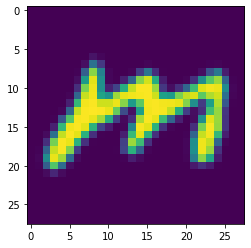

In [87]:
import matplotlib.pyplot as plt

img_index = 14000 # <<<<<  You can update this value to look at other images
img = X_train[img_index]
print("Image Label: " + str(chr(y_train[img_index]+96)))
plt.imshow(img.reshape((28,28)))

In [88]:
# These two lines import the ML libraries we need
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

# This creates our first MLP with 1 hidden layer with 50 neurons and sets it to run through the data 20 times
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

print("Created our first MLP network")

Created our first MLP network


In [89]:
mlp1.fit(X_train, y_train)
print("Training set score: %f" % mlp1.score(X_train, y_train))
print("Test set score: %f" % mlp1.score(X_test, y_test))

Iteration 1, loss = 1.06351395
Iteration 2, loss = 0.64844650
Iteration 3, loss = 0.56103245
Iteration 4, loss = 0.51987725
Iteration 5, loss = 0.49182099
Iteration 6, loss = 0.47301057
Iteration 7, loss = 0.45839220
Iteration 8, loss = 0.44603836
Iteration 9, loss = 0.43479721
Iteration 10, loss = 0.42809575
Iteration 11, loss = 0.41639233
Iteration 12, loss = 0.40782908
Iteration 13, loss = 0.40548360
Iteration 14, loss = 0.39965983
Iteration 15, loss = 0.39296832
Iteration 16, loss = 0.38883219
Iteration 17, loss = 0.38393955
Iteration 18, loss = 0.37948343
Iteration 19, loss = 0.37307616
Iteration 20, loss = 0.37166732


/Users/nishi/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.886500
Test set score: 0.840800


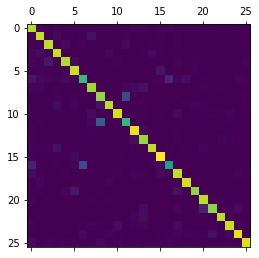

In [90]:
y_pred = mlp1.predict(X_test)

# Now let's visualize the errors between the predictions and the actual labels using a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)

There were 84 times that the letter i was predicted to be the letter l.


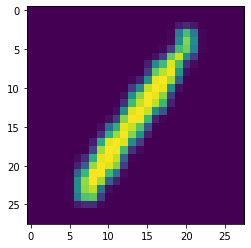

In [91]:
predicted_letter = 'l'
actual_letter = 'i'


# This code counts all mistakes for the letters above
mistake_list = []
for i in range(len(y_test)):
  if (y_test[i] == (ord(actual_letter) - 96) and y_pred[i] == (ord(predicted_letter) - 96)):
    mistake_list.append(i)
print("There were " + str(len(mistake_list)) + " times that the letter " + actual_letter + " was predicted to be the letter " + predicted_letter + ".")

# Once we know how many mistakes were made, we can change this to see an image of a particular one
mistake_to_show = 4 # <<< e.g., change this to 3 if you want to see the 4th mistake

# This code checks that the number mistake you asked for can be shown and if so, displays an image of it
if (len(mistake_list)> mistake_to_show):
  img = X_test[mistake_list[mistake_to_show]]
  plt.imshow(img.reshape((28,28)))
else:
  print("Couldn't show mistake number " + str(mistake_to_show + 1) + " because there were only " + str(len(mistake_list)) + " mistakes to show!")

In [92]:
mlp2 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp2.fit(X_train, y_train)
print("Training set score: %f" % mlp2.score(X_train, y_train))
print("Test set score: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 1.15599672
Iteration 2, loss = 0.54834774
Iteration 3, loss = 0.44784035
Iteration 4, loss = 0.39865207
Iteration 5, loss = 0.36308811
Iteration 6, loss = 0.33567397
Iteration 7, loss = 0.31904877
Iteration 8, loss = 0.29485588
Iteration 9, loss = 0.27846574
Iteration 10, loss = 0.26938228
Iteration 11, loss = 0.25802023
Iteration 12, loss = 0.25788282
Iteration 13, loss = 0.24658006
Iteration 14, loss = 0.23781519
Iteration 15, loss = 0.23350678
Iteration 16, loss = 0.22385322
Iteration 17, loss = 0.22294560
Iteration 18, loss = 0.22080028
Iteration 19, loss = 0.21552087
Iteration 20, loss = 0.21053867
Iteration 21, loss = 0.20596935
Iteration 22, loss = 0.21160896
Iteration 23, loss = 0.19440147
Iteration 24, loss = 0.19589954
Iteration 25, loss = 0.20511452
Iteration 26, loss = 0.19656225
Iteration 27, loss = 0.19325799
Iteration 28, loss = 0.19805697
Iteration 29, loss = 0.19294555
Iteration 30, loss = 0.18795377
Iteration 31, loss = 0.18701266
Iteration 32, los

/Users/nishi/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.947950
Test set score: 0.891900


In [93]:

# Puts all the data in the "files" variable
import os
path, dirs, files = next(os.walk("/Users/nishi/Downloads/lab1-neural-networks/letters_mod/"))
files.sort()

Imported the scanned images.


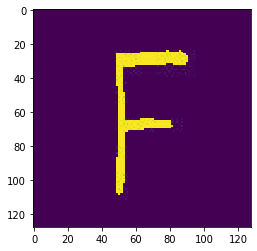

In [94]:
# STEP 4.2

# These libraries let us import the letters, resize them, and print them out
import cv2
import matplotlib.pyplot as plt

# This code processes all the scanned images and adds them to the handwritten_story
handwritten_story = []
for i in range(len(files)):
  img = cv2.imread("/Users/nishi/Downloads/lab1-neural-networks/letters_mod/"+files[i],cv2.IMREAD_GRAYSCALE)
  handwritten_story.append(img)

print("Imported the scanned images.")

plt.imshow(handwritten_story[4])  #<--- Change this index to see different letters

In [95]:
import numpy
import cv2

typed_story = ""
for letter in handwritten_story:
    letter = cv2.resize(letter, (28,28), interpolation = cv2.INTER_CUBIC)
    single_item_array = (numpy.array(letter)).reshape(1,784)
    prediction = mlp2.predict(single_item_array)
    typed_story = typed_story + str(chr(prediction[0]+96))
    
print("Conversion to typed story complete!")
print(typed_story)

Conversion to typed story complete!
thejfaultjiujourjpouerjsuppliesjijfclljiujluvejthejwayjyquajaatteayjoeesjsldwlyjauojtheujalljatjdnce


In [96]:
import numpy

typed_story = ""
for letter in handwritten_story:
  letter = cv2.resize(letter, (28,28), interpolation = cv2.INTER_CUBIC)
    
  #this bit of code checks to see if the image is just a blank space by looking at the color of all the pixels summed
  total_pixel_value = 0
  for j in range(28):
    for k in range(28):
      total_pixel_value += letter[j,k]
  if total_pixel_value < 20:
    typed_story = typed_story + " "
  else:         #if it NOT a blank, it actually runs the prediction algorithm on it
    single_item_array = (numpy.array(letter)).reshape(1,784)
    prediction = mlp2.predict(single_item_array)
    typed_story = typed_story + str(chr(prediction[0]+96))
    
print("Conversion to typed story complete!")
print(typed_story)

Conversion to typed story complete!
the fault iu our pouer supplies i fcll iu luve the way yqua aatteay oees sldwly auo theu all at dnce


Processed the scanned images.


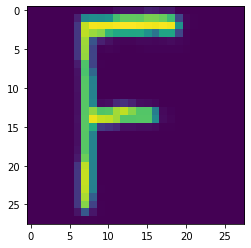

In [97]:
processed_story = []

for img in handwritten_story:
  #step 1: Apply Gaussian blur filter
  img = cv2.GaussianBlur(img, (7,7), 0)
  
  #steps 2 and 3: Extract the Region of Interest in the image and center in square
  points = cv2.findNonZero(img)
  x, y, w, h = cv2.boundingRect(points)
  if (w > 0 and h > 0):
    if w > h:
      y = y - (w-h)//2
      img = img[y:y+w, x:x+w]
    else:
      x = x - (h-w)//2
      img = img[y:y+h, x:x+h]
     
  #step 4: Resize and resample to be 28 x 28 pixels
  img = cv2.resize(img, (28,28), interpolation = cv2.INTER_CUBIC)
  
  #step 5: Normalize pixels and reshape before adding to the new story array
  img = img/255
  img = img.reshape((28,28))
  processed_story.append(img)

print("Processed the scanned images.")

import matplotlib.pyplot as plt
plt.imshow(processed_story[4]) #<<< change this index if you want to see a different letter from the story

In [98]:
import numpy

typed_story = ""
for letter in processed_story:
  #this bit of code checks to see if the image is just a blank space by looking at the color of all the pixels summed
  total_pixel_value = 0
  for j in range(28):
    for k in range(28):
      total_pixel_value += letter[j,k]
  if total_pixel_value < 20:
    typed_story = typed_story + " "
  else:         #if it NOT a blank, it actually runs the prediction algorithm on it
    single_item_array = (numpy.array(letter)).reshape(1,784)
    prediction = mlp2.predict(single_item_array)
    typed_story = typed_story + str(chr(prediction[0]+96))
    
print("Conversion to typed story complete!")
print(typed_story)

Conversion to typed story complete!
the fault tn cur pcwer supplies i fell in love the way ydur battery dies sldwly and then all af dnce
